# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

### Table of Contents
<ol>
    <li><a href="#library"> Importing Libraries and Reading Dataset </li>
    <li><a href="#cleaning"> Data Wrangling </li>
    <li><a href="#EDA"> Exploratory Data Analysis </li>
        <ol>
            <li> <a href="#univariate"> Univariate Analysis </li>
                <ol>
                    <li> <a href="#distplot"> Distplot </li>
                    <li> <a href="#bar"> Bar Plot</li>
                </ol>
            <li> <a href="#bivariate"> Bivariate/Multivariate Analysis </li>
                <ol>
                    <li> <a href="#countplot"> Count Plot </li>
                    <li> <a href="#boxplot"> Box Plot</li>
                    <li> <a href="#corr"> Correlation</li>
                </ol>
         </ol>
     <li><a href="#exp"> Explanatory Data Analysis </li>
     <li><a href="#model_building"> Model Building </li>
     <li><a href="#tuning"> Hyperparameter Tuning </li>
     <li><a href="#conclusion"> Conclusion </li>
</ol>

## 1. Importing libraries and Reading Dataset <a id='library'></a>

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## 2. Data Wrangling <a id='cleaning'></a>

In [5]:
# function to check duplicates
def check_duplicates(df):
    for col in df.columns:
        if type(df[col][0]) is not list and type(df[col][0]) is not dict:
            print('{} duplicates: {}'.format(col, df.duplicated(col).sum()))

In [6]:
# function to check null values
def check_null(df):
    total = len(df)
    for col in df.columns:
        nan_rows = df[col].isnull().sum()
        print('{} has {} % of null values'.format(col, (nan_rows/total)*100))

In [7]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [8]:
len(portfolio)

10

In [9]:
check_duplicates(portfolio)

reward duplicates: 5
difficulty duplicates: 5
duration duplicates: 5
offer_type duplicates: 7
id duplicates: 0


In [10]:
check_null(portfolio)

reward has 0.0 % of null values
channels has 0.0 % of null values
difficulty has 0.0 % of null values
duration has 0.0 % of null values
offer_type has 0.0 % of null values
id has 0.0 % of null values


In [11]:
len(portfolio.id.unique())

10

In [12]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

**There are no duplicate id, no null values.<br> 
Total 10 portfolio exist with following offer type: 
4 of bogo, 4 of discount and 3 of informational.**

In [13]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [14]:
len(profile)

17000

In [15]:
check_duplicates(profile)

gender duplicates: 16996
age duplicates: 16915
id duplicates: 0
became_member_on duplicates: 15284
income duplicates: 16908


In [16]:
check_null(profile)

gender has 12.794117647058822 % of null values
age has 0.0 % of null values
id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 12.794117647058822 % of null values


In [17]:
len(profile.id.unique())

17000

**There are no duplicate customer id** <br>
**Since gender and income has around 12 % of null values. <br>
So it will be better to remove the rows where gender or income are null**

In [18]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [19]:
len(transcript)

306534

In [20]:
check_duplicates(transcript)

person duplicates: 289534
event duplicates: 306530
time duplicates: 306414


In [21]:
len(transcript.person.unique())

17000

In [22]:
check_null(transcript)

person has 0.0 % of null values
event has 0.0 % of null values
value has 0.0 % of null values
time has 0.0 % of null values


**There are same number of unique customer in profile as there are total customer in profile**

**Combining person dataframe and transcript dataframe according to customer id**

In [23]:
profile = profile.rename(columns = {'id':'customer_id'})

In [24]:
profile.head(1)

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN


In [25]:
transcript = transcript.rename(columns = {'person':'customer_id'})

In [26]:
transcript.head(1)

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [27]:
temp_comb = pd.merge(profile, transcript, on='customer_id')

In [28]:
temp_comb.head()

,gender,age,customer_id,became_member_on,income,event,value,time
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168
1,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216
2,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336
3,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348
4,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,transaction,{'amount': 0.35000000000000003},360


In [29]:
check_duplicates(temp_comb)

gender duplicates: 306530
age duplicates: 306449
customer_id duplicates: 289534
became_member_on duplicates: 304818
income duplicates: 306442
event duplicates: 306530
time duplicates: 306414


In [30]:
len(temp_comb)

306534

In [31]:
check_null(temp_comb)

gender has 11.017374907840566 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 11.017374907840566 % of null values
event has 0.0 % of null values
value has 0.0 % of null values
time has 0.0 % of null values


In [32]:
len(temp_comb.customer_id.unique())

17000

**There are 17000 unique customers in combined dataframe and<br>
and around 11 % rows has null values. So removing rows with any null values**

In [33]:
temp_comb = temp_comb.dropna(axis=0, subset=['gender'])

In [34]:
check_null(temp_comb)

gender has 0.0 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 0.0 % of null values
event has 0.0 % of null values
value has 0.0 % of null values
time has 0.0 % of null values


In [35]:
len(temp_comb)

272762

In [36]:
len(temp_comb.customer_id.unique())

14825

In [37]:
temp_comb.head(2)

,gender,age,customer_id,became_member_on,income,event,value,time
21,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18
22,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144


In [38]:
portfolio.head(2)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


In [39]:
temp_comb.reset_index(drop=True, inplace=True)

In [40]:
temp_comb.head(2)

,gender,age,customer_id,became_member_on,income,event,value,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144


In [41]:
temp_comb=pd.concat([temp_comb, temp_comb['value'].apply(pd.Series)], axis=1)

In [42]:
temp_comb.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,offer id,offer_id,reward
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,3f207df678b143eea3cee63160fa8bed,NaN,NaN
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,NaN


In [43]:
temp_comb.reward.value_counts()

5.0     11677
2.0      8914
10.0     6967
3.0      4886
Name: reward, dtype: int64

In [44]:
temp_comb['offer_id_new']=np.where(temp_comb['offer id'].isnull() & temp_comb['offer_id'].notnull(),temp_comb['offer_id'],temp_comb['offer id'])

#drop unnecessary offer_id columns
temp_comb.drop(['offer id','offer_id'],axis=1,inplace=True)

#rename offer_id column
temp_comb.rename(columns={'offer_id_new':'offer_id'},inplace=True)

In [45]:
temp_comb.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN


In [46]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [47]:
temp2 = temp_comb

In [48]:
temp2.head(2)

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN


In [49]:
portfolio = portfolio.rename(columns = {'id':'offer_id'})

In [50]:
temp2['offer_type'] = 'None'

In [51]:
temp2.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed,None
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,None


In [52]:
temp2.shape

(272762, 12)

In [53]:
portfolio_offer_id = portfolio['offer_id'].tolist()    

In [54]:
portfolio_offer_id

['ae264e3637204a6fb9bb56bc8210ddfd',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 '3f207df678b143eea3cee63160fa8bed',
 '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '5a8bc65990b245e5a138643cd4eb9837',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2906b810c7d4411798c6938adc9daaa5']

In [55]:
'ae264e3637204a6fb9bb56bc8210ddfd' in portfolio_offer_id

True

In [56]:
portfolio[portfolio['offer_id']=='ae264e3637204a6fb9bb56bc8210ddfd'].index.values[0]

0

In [57]:
temp2['offer_id'].values[0]

nan

In [58]:
temp2['duration'] = 0

In [59]:
temp2['difficulty'] = 0

In [60]:
temp2['reward_new'] = 0

In [61]:
temp2.shape

(272762, 15)

In [62]:
temp2.head(2)

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0


In [63]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [64]:
from progressbar import ProgressBar

In [65]:
type(portfolio['channels'].values[0])

list

In [66]:
temp2.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,0,0,0
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed,None,0,0,0
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,None,0,0,0


In [67]:
temp2['channels'] = [list() for x in range(len(temp2.index))]

In [68]:
temp2.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new,channels
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0,[]
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0,[]
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,None,0,0,0,[]
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed,None,0,0,0,[]
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,None,0,0,0,[]


In [69]:
pbar = ProgressBar()
for row in pbar(range(272762)):
    current_offer = temp2['offer_id'].values[row]
    if current_offer in portfolio_offer_id:
        ind = portfolio[portfolio['offer_id']==current_offer].index.values[0]
        temp2.at[row,'offer_type']= portfolio['offer_type'].values[ind]
        temp2.at[row,'duration']= portfolio['duration'].values[ind]
        temp2.at[row,'difficulty']= portfolio['difficulty'].values[ind]
        temp2.at[row,'channels']= portfolio['channels'].values[ind]
        temp2.at[row,'reward_new']= portfolio['reward'].values[ind]

100% |########################################################################|


In [70]:
temp2.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new,channels
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0,[]
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0,[]
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,7,5,5,"[web, email, mobile]"
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed,informational,4,0,0,"[web, email, mobile]"
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,None,0,0,0,[]


In [71]:
df = temp2

In [72]:
df.head(2)

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new,channels
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0,[]
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0,[]


**Now I have combined 3 dataframes, let's do some more data cleaning.**

In [73]:
def encode_cat_var(dataframe, col):
    """ 
    Function to encode categorical variable to numeric in a dataframe.
    
    Parameters: 
    arg1 (int): Dataframe
    arg2 (string) : Column Name
  
    Returns: 
    tuple : Tuple containing a modified dataframe and a dictionary containing encoded mapping.
  
    """
    df = dataframe
    encoder =  LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    return (df, mapping)

In [74]:
df.dtypes

gender               object
age                   int64
customer_id          object
became_member_on      int64
income              float64
event                object
value                object
time                  int64
amount              float64
reward              float64
offer_id             object
offer_type           object
duration              int64
difficulty            int64
reward_new            int64
channels             object
dtype: object

In [75]:
cat_columns = ['gender', 'event', 'offer_type']

In [76]:
str_columns = ['customer_id', 'offer_id']

In [77]:
for col in cat_columns:
    df[col] = df[col].astype('category')

In [78]:
check_null(df)

gender has 0.0 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 0.0 % of null values
event has 0.0 % of null values
value has 0.0 % of null values
time has 0.0 % of null values
amount has 54.55488667776304 % of null values
reward has 88.10538124812108 % of null values
offer_id has 45.44511332223697 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward_new has 0.0 % of null values
channels has 0.0 % of null values


In [79]:
df.shape

(272762, 16)

In [80]:
df.head()

,gender,age,customer_id,became_member_on,income,event,value,time,amount,reward,offer_id,offer_type,duration,difficulty,reward_new,channels
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 21.51},18,21.51,NaN,NaN,None,0,0,0,[]
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 32.28},144,32.28,NaN,NaN,None,0,0,0,[]
2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,7,5,5,"[web, email, mobile]"
3,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,NaN,NaN,3f207df678b143eea3cee63160fa8bed,informational,4,0,0,"[web, email, mobile]"
4,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,transaction,{'amount': 23.22},528,23.22,NaN,NaN,None,0,0,0,[]


**Handling null values**

In [81]:
df.amount.fillna(value=0, inplace=True)

In [82]:
df.reward.fillna(value=0, inplace=True)

In [83]:
df.offer_id.fillna(value=0, inplace=True)

In [84]:
df.shape

(272762, 16)

In [85]:
del df['reward']

In [86]:
df.rename(columns={'reward_new':'reward'},inplace=True)

In [87]:
check_null(df)

gender has 0.0 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 0.0 % of null values
event has 0.0 % of null values
value has 0.0 % of null values
time has 0.0 % of null values
amount has 0.0 % of null values
offer_id has 0.0 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward has 0.0 % of null values
channels has 0.0 % of null values


In [88]:
df.shape

(272762, 15)

In [89]:
df, gender_mapping = encode_cat_var(df, 'gender')
print(gender_mapping)

{'F': 0, 'M': 1, 'O': 2}


In [90]:
df, event_mapping = encode_cat_var(df, 'event')
print(event_mapping)

{'offer completed': 0, 'offer received': 1, 'offer viewed': 2, 'transaction': 3}


In [91]:
df.dtypes

gender                 int32
age                    int64
customer_id           object
became_member_on       int64
income               float64
event                  int32
value                 object
time                   int64
amount               float64
offer_id              object
offer_type          category
duration               int64
difficulty             int64
reward                 int64
channels              object
dtype: object

In [92]:
df['offer_id'] = df['offer_id'].apply(str)

In [93]:
df, offer_id_mapping = encode_cat_var(df, 'offer_id')
print(offer_id_mapping)

{'0': 0, '0b1e1539f2cc45b7b9fa7c272da2e1d7': 1, '2298d6c36e964ae4a3e7e9706d1fb8c2': 2, '2906b810c7d4411798c6938adc9daaa5': 3, '3f207df678b143eea3cee63160fa8bed': 4, '4d5c57ea9a6940dd891ad53e9dbe8da0': 5, '5a8bc65990b245e5a138643cd4eb9837': 6, '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7, 'ae264e3637204a6fb9bb56bc8210ddfd': 8, 'f19421c1d4aa40978ebb69ca19b0e20d': 9, 'fafdcd668e3743c1bb461111dcafc2a4': 10}


In [94]:
df, offer_type_mapping = encode_cat_var(df, 'offer_type')
print(offer_type_mapping)

{'None': 0, 'bogo': 1, 'discount': 2, 'informational': 3}


In [95]:
del df['value']

In [96]:
df.head(2)

,gender,age,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,channels
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,[]
1,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,[]


In [97]:
channels = df["channels"].str.join(sep="*").str.get_dummies(sep="*")

In [98]:
df = pd.concat([df, channels], axis=1, sort=False)

In [99]:
del df['channels']

In [100]:
df.head()

,gender,age,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0
1,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0
2,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,408,0.00,7,1,7,5,5,1,1,0,1
3,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,504,0.00,4,3,4,0,0,1,1,0,1
4,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,528,23.22,0,0,0,0,0,0,0,0,0


In [101]:
len(df.groupby('customer_id'))

14825

In [102]:
len(df['customer_id'].unique())

14825

In [103]:
offer_type_mapping

{'None': 0, 'bogo': 1, 'discount': 2, 'informational': 3}

In [105]:
df.shape

(272762, 17)

In [106]:
check_null(df)

gender has 0.0 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 0.0 % of null values
event has 0.0 % of null values
time has 0.0 % of null values
amount has 0.0 % of null values
offer_id has 0.0 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward has 0.0 % of null values
email has 0.0 % of null values
mobile has 0.0 % of null values
social has 0.0 % of null values
web has 0.0 % of null values


In [107]:
df['respond_to_offer'] = 0

In [108]:
df.shape

(272762, 18)

In [109]:
df.head()

,gender,age,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0,0
1,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0,0
2,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,408,0.00,7,1,7,5,5,1,1,0,1,0
3,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,504,0.00,4,3,4,0,0,1,1,0,1,0
4,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,528,23.22,0,0,0,0,0,0,0,0,0,0


In [110]:
pbar = ProgressBar()
for row in pbar(range(272762)):
    current_event = df.at[row,'event']
    if current_event == 0:
        df.at[row,'respond_to_offer'] = 1

100% |########################################################################|


In [111]:
df.head(10)

,gender,age,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0,0
1,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0,0
2,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,408,0.00,7,1,7,5,5,1,1,0,1,0
3,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,504,0.00,4,3,4,0,0,1,1,0,1,0
4,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,528,23.22,0,0,0,0,0,0,0,0,0,0
5,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,0,528,0.00,7,1,7,5,5,1,1,0,1,1
6,0,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,0.00,7,1,7,5,5,1,1,0,1,0
7,0,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,2,6,0.00,7,1,7,5,5,1,1,0,1,0
8,0,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,3,132,19.89,0,0,0,0,0,0,0,0,0,0
9,0,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,0,132,0.00,7,1,7,5,5,1,1,0,1,1


In [113]:
df.to_csv('combined.csv', encoding='utf-8', index=False)

In [218]:
df = pd.read_csv('combined.csv')

In [247]:
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW

In [248]:
def plot_distplot(df, col):
    mean = scipy.mean(df[col])
    median = scipy.median(df[col])
    plt.figure(figsize=(8,8))
    sns.distplot(df[col])
    plt.axvline(mean, color='r',label='mean')
    plt.axvline(median, color='b',label='median')
    plt.legend()

In [219]:
df.head()

,gender,age,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0,0
1,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0,0
2,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,408,0.00,7,1,7,5,5,1,1,0,1,0
3,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,504,0.00,4,3,4,0,0,1,1,0,1,0
4,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,528,23.22,0,0,0,0,0,0,0,0,0,0


In [220]:
check_null(df)

gender has 0.0 % of null values
age has 0.0 % of null values
customer_id has 0.0 % of null values
became_member_on has 0.0 % of null values
income has 0.0 % of null values
event has 0.0 % of null values
time has 0.0 % of null values
amount has 0.0 % of null values
offer_id has 0.0 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward has 0.0 % of null values
email has 0.0 % of null values
mobile has 0.0 % of null values
social has 0.0 % of null values
web has 0.0 % of null values
respond_to_offer has 0.0 % of null values


In [221]:
df['age'].describe()

count    272762.000000
mean         53.840696
std          17.551337
min          18.000000
25%          41.000000
50%          55.000000
75%          66.000000
max         101.000000
Name: age, dtype: float64

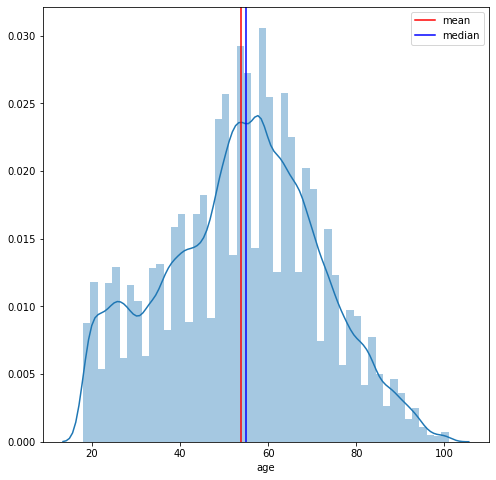

In [222]:
plot_distplot(df, 'age')

**There are total 84 different ages, so binning them.**

In [223]:
age_bins = [0,10,20,30,40,50,60,70,80,90,100,110]
age_labels = [1,2,3,4,5,6,7,8,9,10,11]
df['binned_age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [224]:
del df['age']

In [225]:
df.head(2)

,gender,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age
0,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6
1,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6


In [226]:
from datetime import datetime
def convert_to_datetime(elem):
    """Converts a string to a datetime object
    
    INPUT:
        elem: String that stores a date in the %Y%m%d format
    OUTPUT:
        datetimeobj: Datetime object"""
    return datetime.strptime(str(elem), '%Y%m%d')

In [227]:
df['date'] = df['became_member_on'].apply(convert_to_datetime)

In [228]:
df.head()

,gender,customer_id,became_member_on,income,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,date
0,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,2017-07-15
1,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,2017-07-15
2,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,2017-07-15
3,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,2017-07-15
4,0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,2017-07-15


In [229]:
del df['became_member_on']

In [230]:
df['income'].describe()

count    272762.000000
mean      64337.000755
std       21243.762941
min       30000.000000
25%       48000.000000
50%       62000.000000
75%       78000.000000
max      120000.000000
Name: income, dtype: float64

**Binning income**

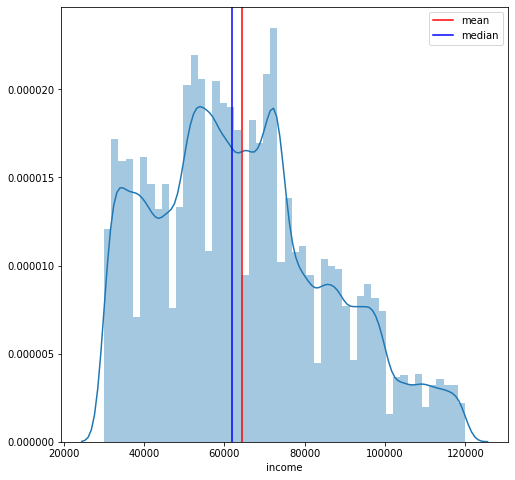

In [232]:
plot_distplot(df, 'income')

In [233]:
income_bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]
income_labels = [2,3,4,5,6,7,8,9,10,11,12,13]
df['binned_income'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

In [234]:
del df['income']

In [243]:
df.time.describe()

count    272762.000000
mean        366.707694
std         200.359087
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

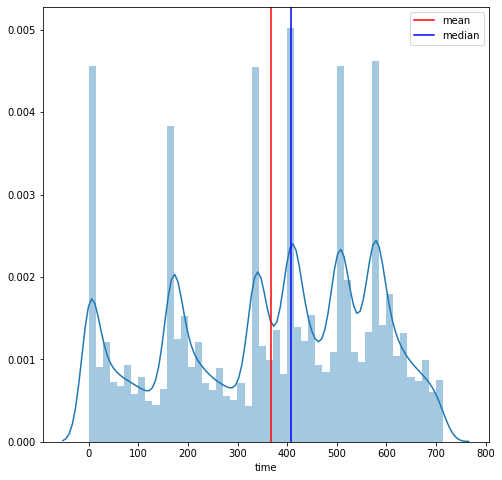

In [244]:
plot_distplot(df, 'time')

In [249]:
check_null(df)

gender has 0.0 % of null values
customer_id has 0.0 % of null values
event has 0.0 % of null values
time has 0.0 % of null values
amount has 0.0 % of null values
offer_id has 0.0 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward has 0.0 % of null values
email has 0.0 % of null values
mobile has 0.0 % of null values
social has 0.0 % of null values
web has 0.0 % of null values
respond_to_offer has 0.0 % of null values
binned_age has 0.0 % of null values
date has 0.0 % of null values
binned_income has 0.0 % of null values


In [250]:
df.amount.describe()

count    272762.000000
mean          6.360646
std          22.509207
min           0.000000
25%           0.000000
50%           0.000000
75%           9.140000
max        1062.280000
Name: amount, dtype: float64

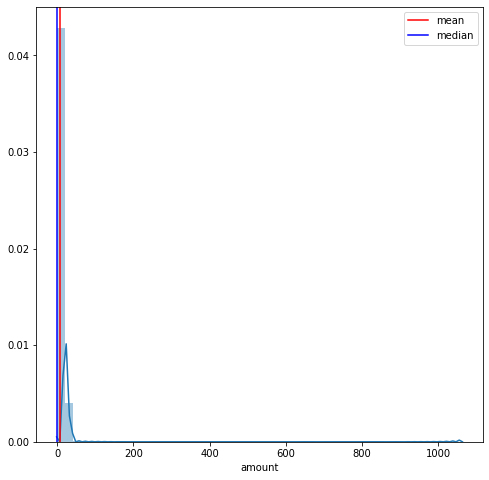

In [251]:
plot_distplot(df,'amount')

In [252]:
q = df["amount"].quantile(0.99)

In [253]:
df = df[df["amount"] < q]

In [271]:
df.shape

(270033, 19)

In [254]:
df.amount.describe()

count    270033.000000
mean          5.311545
std           8.421955
min           0.000000
25%           0.000000
50%           0.000000
75%           8.580000
max          35.340000
Name: amount, dtype: float64

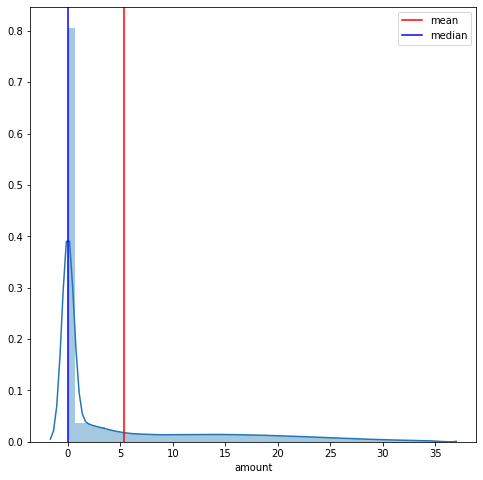

In [272]:
plot_distplot(df, 'amount')

In [280]:
check_null(df)

gender has 0.0 % of null values
customer_id has 0.0 % of null values
event has 0.0 % of null values
time has 0.0 % of null values
amount has 0.0 % of null values
offer_id has 0.0 % of null values
offer_type has 0.0 % of null values
duration has 0.0 % of null values
difficulty has 0.0 % of null values
reward has 0.0 % of null values
email has 0.0 % of null values
mobile has 0.0 % of null values
social has 0.0 % of null values
web has 0.0 % of null values
respond_to_offer has 0.0 % of null values
binned_age has 0.0 % of null values
date has 0.0 % of null values
binned_income has 0.0 % of null values


In [278]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,date,binned_income
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,2017-07-15,12
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,2017-07-15,12
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12


In [281]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [283]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [284]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,date,binned_income,year,month
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12,2017,7
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12,2017,7
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,2017-07-15,12,2017,7
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,2017-07-15,12,2017,7
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,2017-07-15,12,2017,7


In [285]:
del df['date']

**To classify new customer wheter he/she will respond to offer or not,  <br> 
we will not have event, time and amount for new customer. So dropping these for training the model**

In [286]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,binned_income,year,month
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,12,2017,7
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,12,2017,7
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,12,2017,7


**Saving dataframe**

In [287]:
df.to_csv('clean.csv', encoding='utf-8', index=False)

## 3. Exploratory Data Analysis <a id='EDA'></a>

### A. Univariate Analysis <a id='univariate'></a>  

#### a. Distplot  <a id='distplot'></a>
**To get frequency distributions**

In [380]:
quant_columns = ['time', 'amount']
mapped_columns = ['gender', 'event', 'offer_id', 'offer_type']

In [381]:
non_mapped_columns = ['duration', 'difficulty', 'reward', 'email', 'mobile', 'social', 'web',
                      'binned_age', 'binned_income', 'year', 'month', 'respond_to_offer']

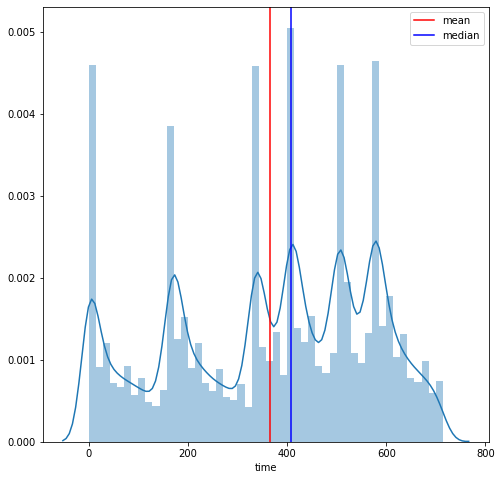

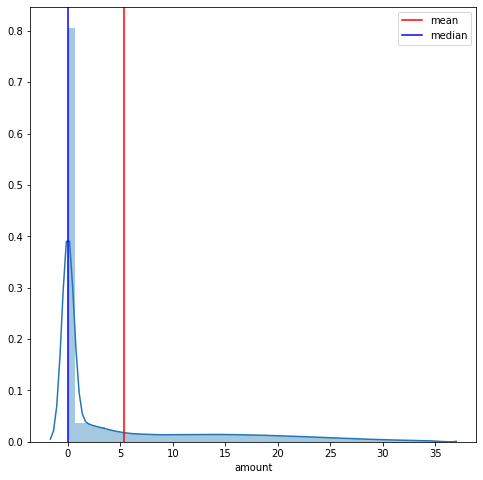

In [291]:
for col in quant_columns:
    plot_distplot(df, col)

**Insights: amount has some outlier.**

#### b. Bar Plot <a id='bar'></a>

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd

In [409]:
def count_plot_legend(df, col, mapping):
    class TextHandler(HandlerBase):
        def create_artists(self, legend, tup ,xdescent, ydescent,
                            width, height, fontsize,trans):
            tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                      ha="center", va="center", color=tup[1], fontweight="bold")
            return [tx]



    base_color = sns.color_palette()[0]
    ax = sns.countplot(x = df[col], color= base_color)


    handltext = list(mapping.values())
    handltext = list(map(str, handltext))
    labels = list(mapping.keys())


    t = ax.get_xticklabels()
    labeldic = dict(zip(handltext, labels))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

    ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

    plt.show()

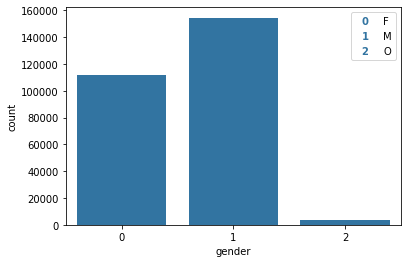

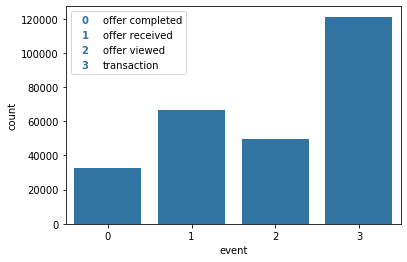

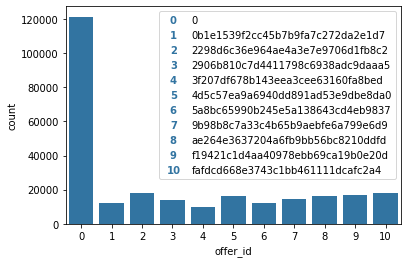

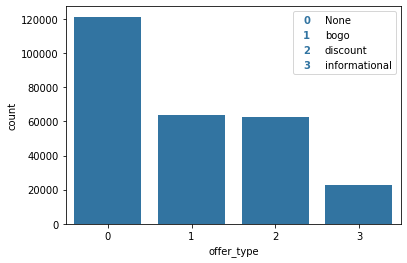

In [411]:
for col in mapped_columns:
    m = col + '_mapping'
    mapping = globals()[m]
    count_plot_legend(df,col ,mapping)

**Insights: There are more male who use the app than female. <br>
Very few complete the offer and most of the app user does not recieve offers**

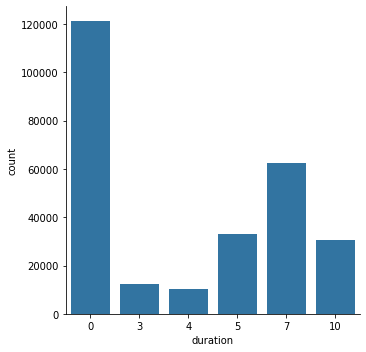

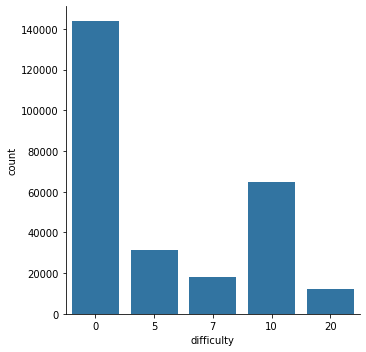

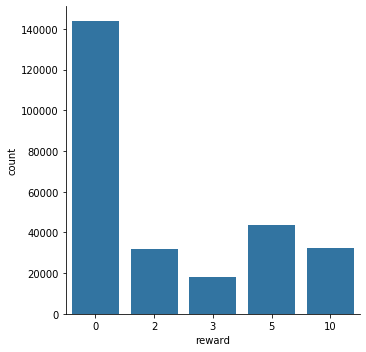

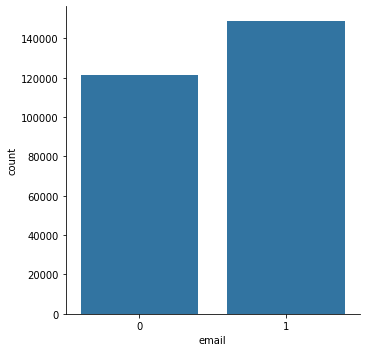

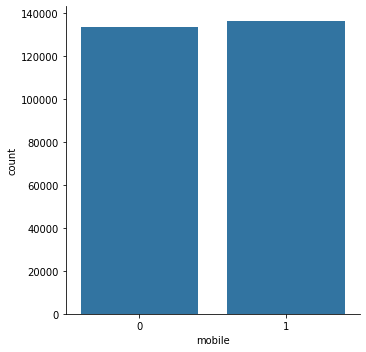

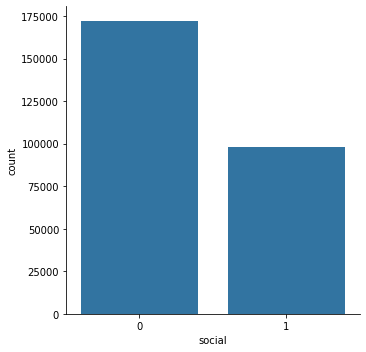

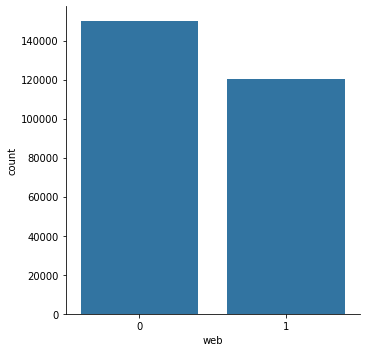

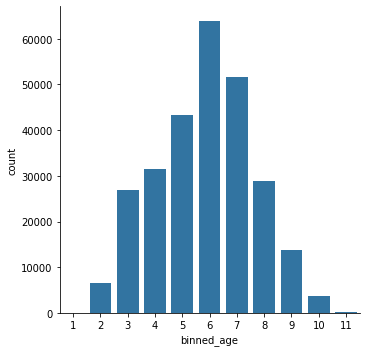

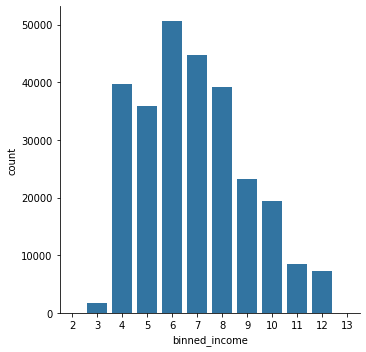

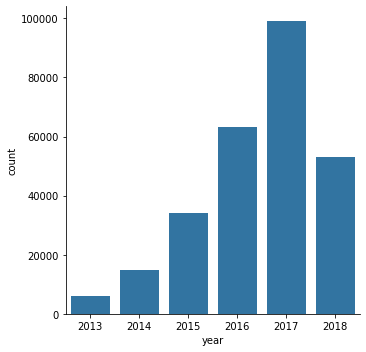

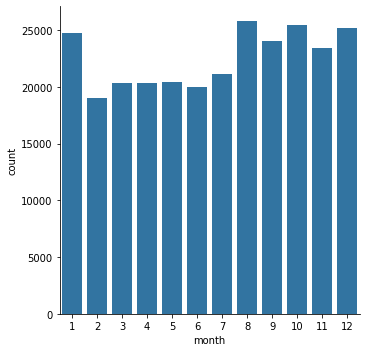

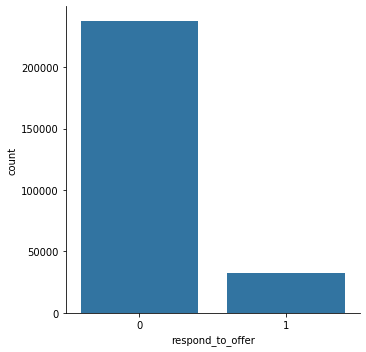

In [418]:
for col in non_mapped_columns:
    base_color = sns.color_palette()[0]
    sns.catplot(x=col, kind="count", color= base_color, data=df)

**Insight: Very few people respond to offer, that is, completes the offer.**

### B. Bivariate/Multivariate Analysis<a id='bivariate'></a>

In [419]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,binned_income,year,month
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,12,2017,7
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,12,2017,7
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,12,2017,7


#### a. Countplot <a id='countplot'></a>

gender  respond_to_offer
0       0                    96143
        1                    15477
1       0                   137997
        1                    16466
2       0                     3449
        1                      501
dtype: int64
***********************
event  respond_to_offer
0      1                    32444
1      0                    66501
2      0                    49860
3      0                   121228
dtype: int64
***********************
offer_id  respond_to_offer
0         0                   121228
1         0                     8941
          1                     3386
2         0                    13034
          1                     4886
3         0                    10091
          1                     3911
4         0                    10144
5         0                    12922
          1                     3310
6         0                    12516
7         0                    10184
          1                     4188
8         0            

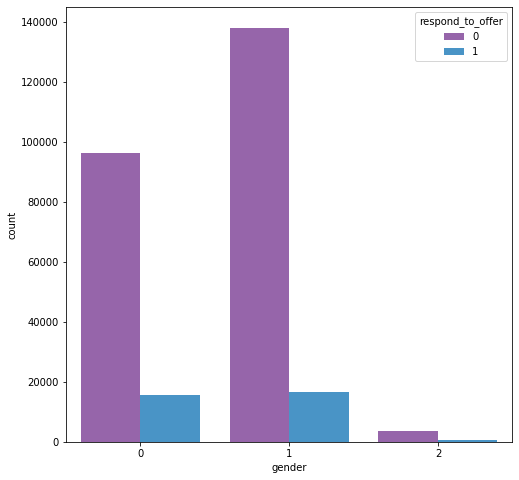

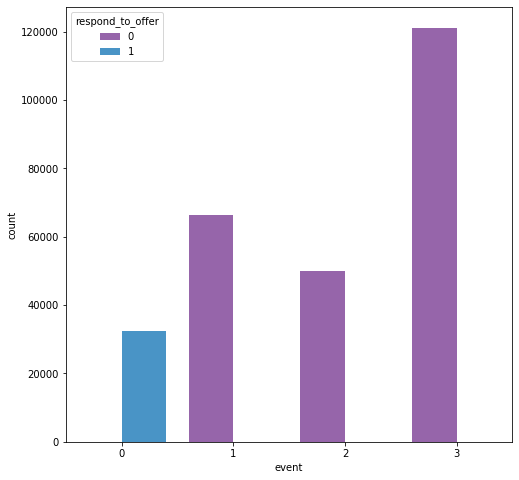

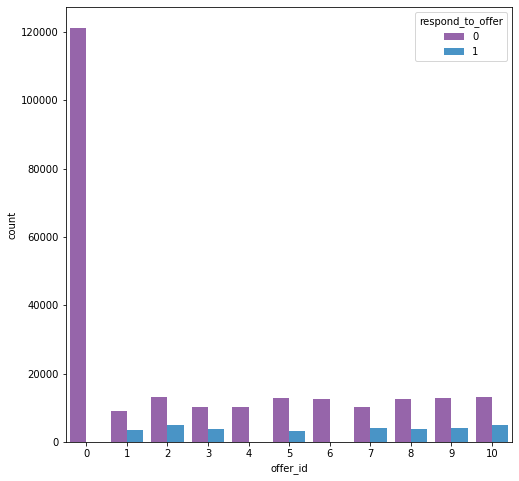

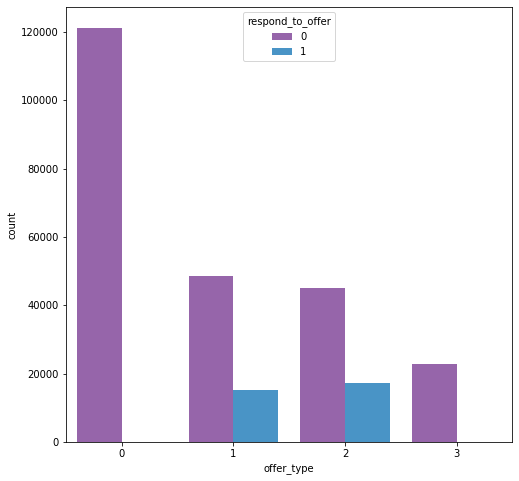

In [420]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for var in mapped_columns:
    temp = df.groupby([var,'respond_to_offer']).size()
    print(temp)
    print('***********************')
    plt.figure(figsize=(8,8))
    sns.countplot(data=df,x=var,hue='respond_to_offer', palette=flatui)

duration  respond_to_offer
0         0                   121228
3         0                    12516
4         0                    10144
5         0                    25808
          1                     7413
7         0                    45893
          1                    16642
10        0                    22000
          1                     8389
dtype: int64
***********************
difficulty  respond_to_offer
0           0                   143888
5           0                    23070
            1                     8291
7           0                    13034
            1                     4886
10          0                    48656
            1                    15881
20          0                     8941
            1                     3386
dtype: int64
***********************
reward  respond_to_offer
0       0                   143888
2       0                    23150
        1                     8914
3       0                    13034
        1            

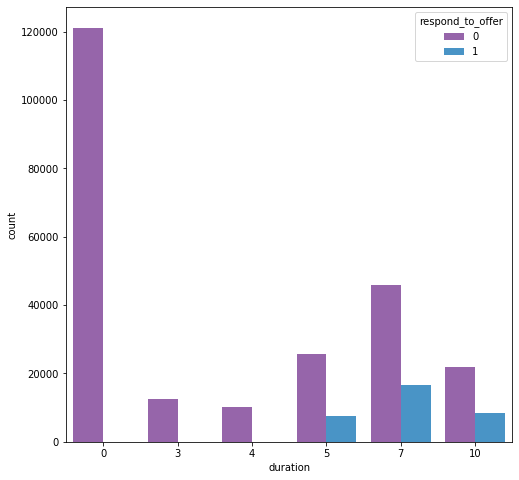

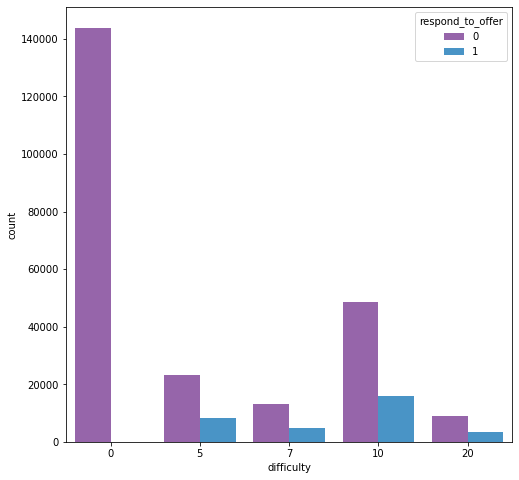

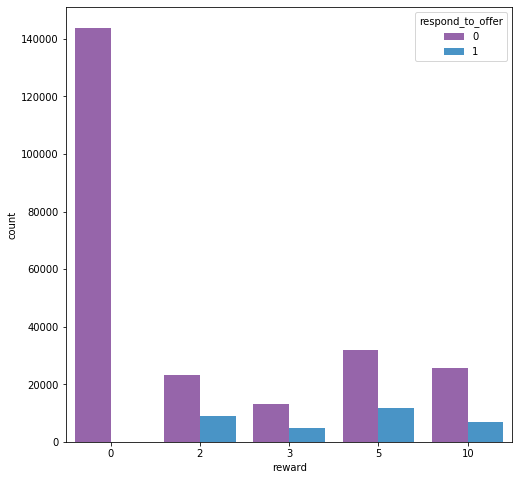

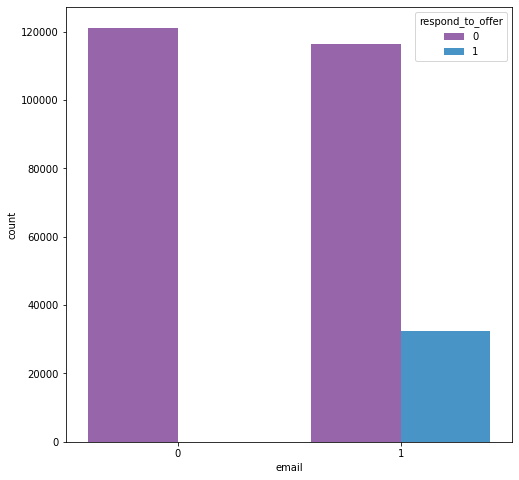

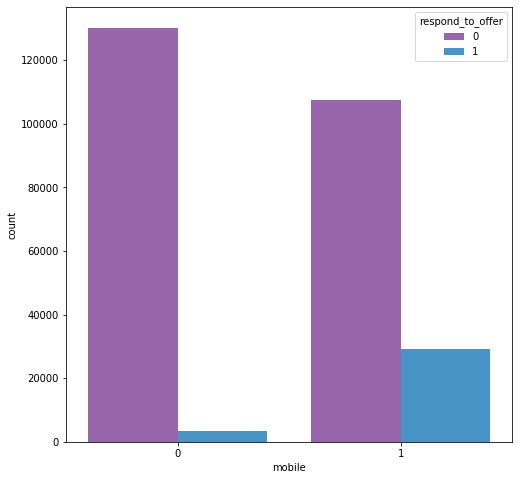

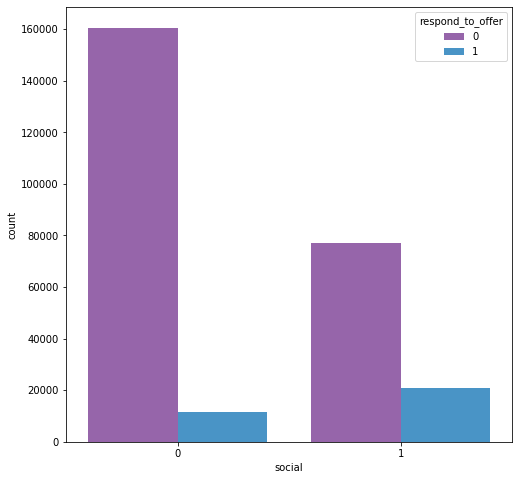

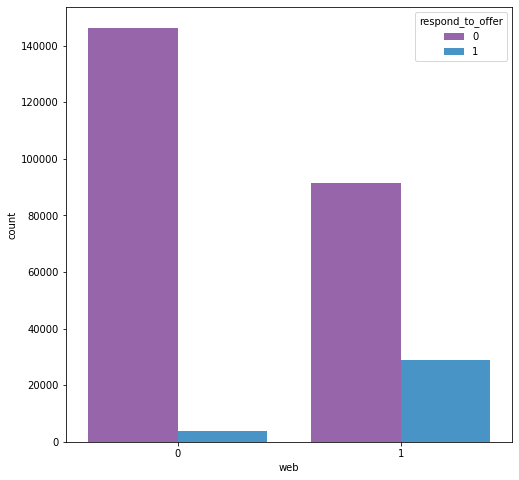

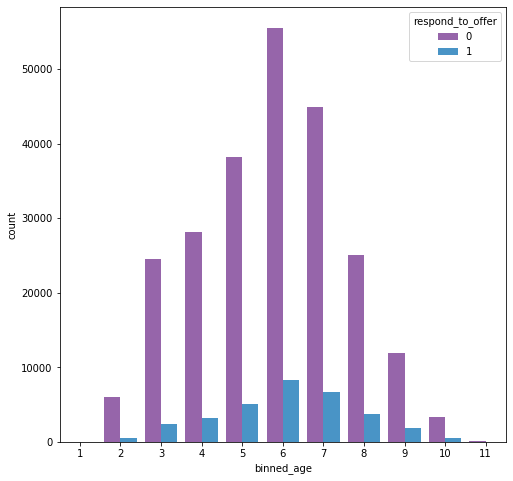

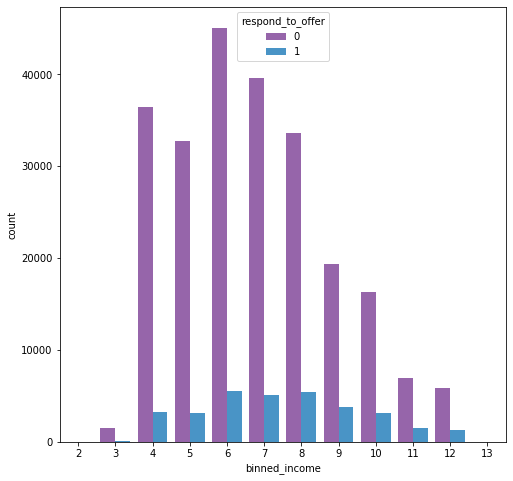

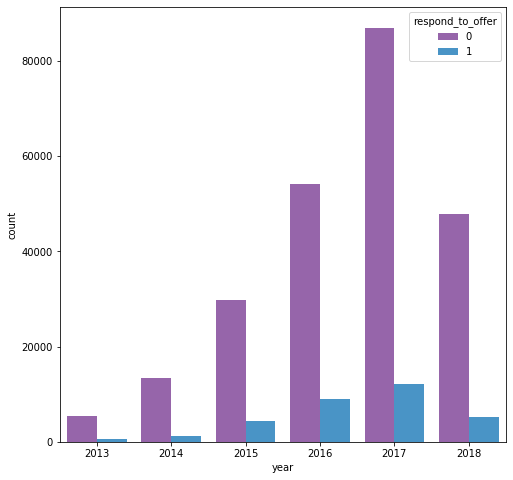

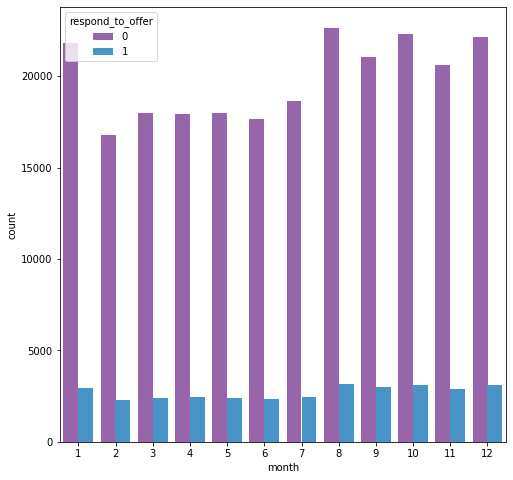

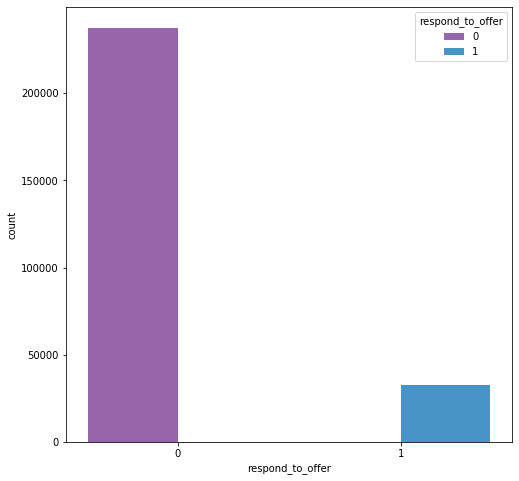

In [425]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for var in non_mapped_columns:
    temp = df.groupby([var,'respond_to_offer']).size()
    print(temp)
    print('***********************')
    plt.figure(figsize=(8,8))
    sns.countplot(data=df,x=var,hue='respond_to_offer', palette=flatui)

#### b. Boxplot <a id='boxplot'></a>

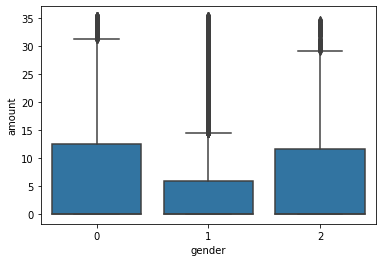

In [427]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'gender', y = 'amount', color = base_color)

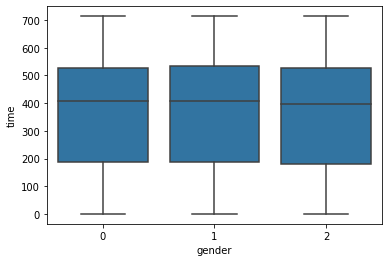

In [428]:
sns.boxplot(data = df, x = 'gender', y = 'time', color = base_color)

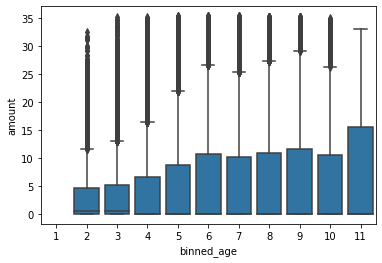

In [429]:
sns.boxplot(data = df, x = 'binned_age', y = 'amount', color = base_color)

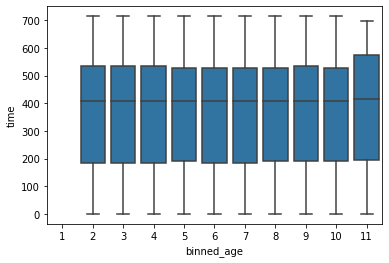

In [431]:
sns.boxplot(data = df, x = 'binned_age', y = 'time', color = base_color)

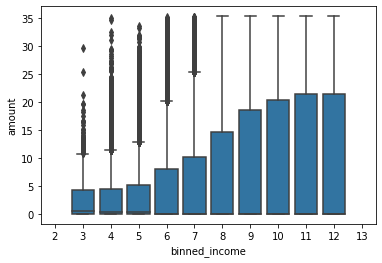

In [432]:
sns.boxplot(data = df, x = 'binned_income', y = 'amount', color = base_color)

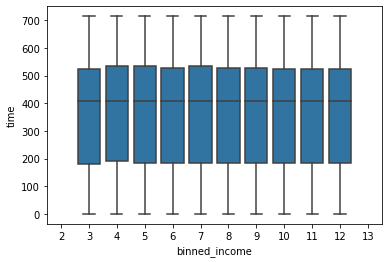

In [433]:
sns.boxplot(data = df, x = 'binned_income', y = 'time', color = base_color)

#### c. Correlation <a id='corr'></a>

In [437]:
df.corr()

,gender,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,year,month
gender,1.000000,0.041506,-0.000333,-0.099056,-0.022194,-0.022679,-0.029616,-0.028675,-0.027317,-0.031526,-0.026295,-0.017041,-0.027766,-0.044792,-0.035653,-0.028184
event,0.041506,1.000000,0.032084,0.603873,-0.673984,-0.710949,-0.813719,-0.676273,-0.588906,-0.864230,-0.770675,-0.554622,-0.730546,-0.669160,-0.074058,-0.000399
time,-0.000333,0.032084,1.000000,0.044751,-0.057567,-0.060442,-0.051374,-0.035947,-0.040740,-0.065994,-0.064838,-0.051850,-0.046818,0.061083,-0.008791,0.006440
amount,-0.099056,0.603873,0.044751,1.000000,-0.554300,-0.595121,-0.629805,-0.505690,-0.462386,-0.698741,-0.637544,-0.475857,-0.564238,-0.233057,-0.032324,0.015708
offer_id,-0.022194,-0.673984,-0.057567,-0.554300,1.000000,0.559242,0.717161,0.457330,0.590526,0.793284,0.843968,0.744903,0.556301,0.269081,0.083947,-0.001443
offer_type,-0.022679,-0.710949,-0.060442,-0.595121,0.559242,1.000000,0.738001,0.510097,0.234521,0.851705,0.752007,0.504715,0.656419,0.212993,0.093781,-0.001815
duration,-0.029616,-0.813719,-0.051374,-0.629805,0.717161,0.738001,1.000000,0.881506,0.610564,0.901343,0.738119,0.559889,0.807923,0.370733,0.092345,-0.003043
difficulty,-0.028675,-0.676273,-0.035947,-0.505690,0.457330,0.510097,0.881506,1.000000,0.696823,0.723716,0.456446,0.411589,0.673043,0.338392,0.073441,-0.003407
reward,-0.027317,-0.588906,-0.040740,-0.462386,0.590526,0.234521,0.610564,0.696823,1.000000,0.661742,0.588539,0.599159,0.457007,0.276694,0.070858,-0.003056
email,-0.031526,-0.864230,-0.065994,-0.698741,0.793284,0.851705,0.901343,0.723716,0.661742,1.000000,0.912418,0.681021,0.807507,0.333539,0.107174,-0.002566


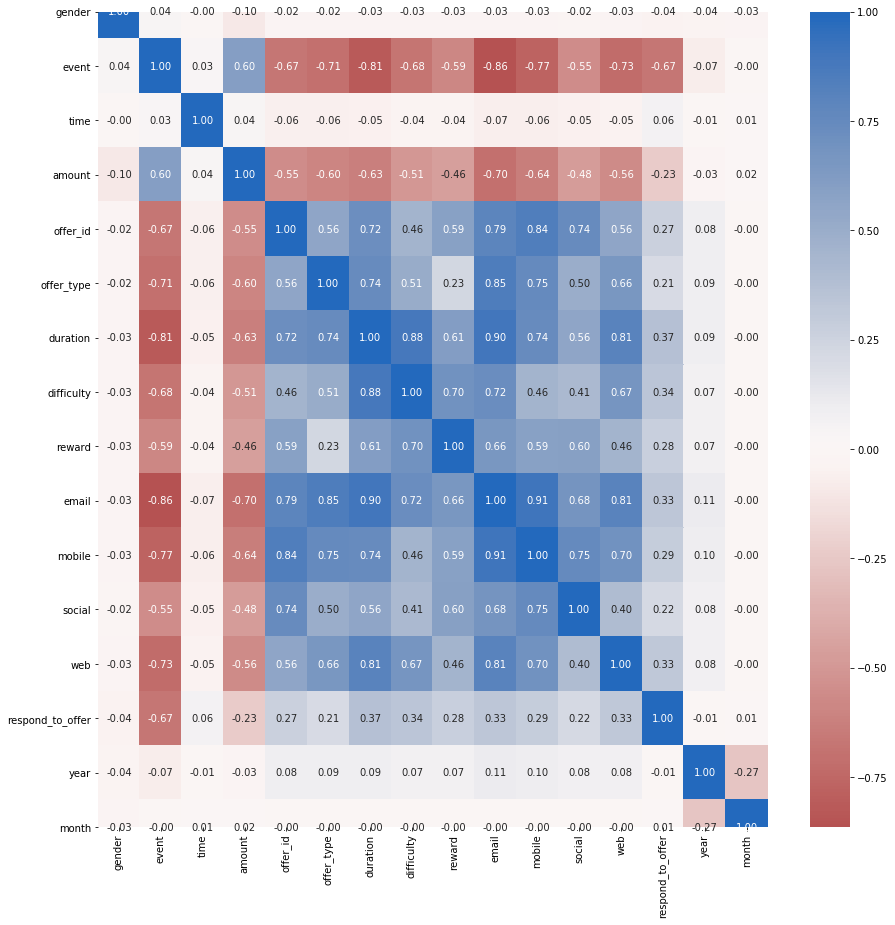

In [445]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

**Insights:** 
<ul>
  <li>event is highly negatively correlated with response_to_offer.</li>
  <li>duration, difficulty, reward, email, moobile, social and web are slightly positively correlated with response_to_offer. </li>
</ul>

 

In [450]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,binned_income,year,month
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,12,2017,7
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,12,2017,7
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,12,2017,7


## 4. Explanatory Data Analysis <a id='exp'></a>  

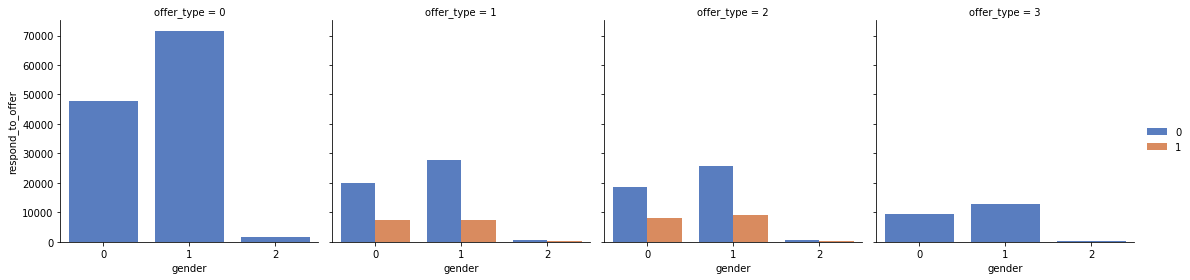

In [485]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)

grid = sns.FacetGrid(data=df,col='offer_type',size=4,aspect=1)
fig = grid.map(countplot,'gender','respond_to_offer',palette='muted')
fig.add_legend()

In [486]:
gender_mapping

{'F': 0, 'M': 1, 'O': 2}

In [488]:
offer_type_mapping

{'None': 0, 'bogo': 1, 'discount': 2, 'informational': 3}

**Insights: Male and Female almost equally complete the offer. Both mostly complete the offer of type 'BOGO' and 'Discount'**

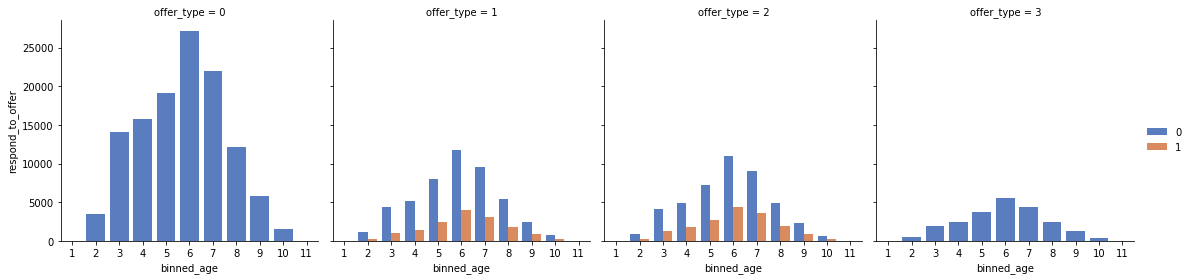

In [490]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)

grid = sns.FacetGrid(data=df,col='offer_type',size=4,aspect=1)
fig = grid.map(countplot,'binned_age','respond_to_offer',palette='muted')
fig.add_legend()

**Insights:** 
<ul>
  <li>People of all ages respond almost equally to 'BOGO' and 'Discount'</li>
  <li>People of age 50-60 complete the offer - Discount most </li>
  <li>Then People of age 60-70 complete the offer - Discount most</li>
  <li>Offer Type BOGO and Discount has almost similar distribution of response across different age groups</li>
</ul>

 

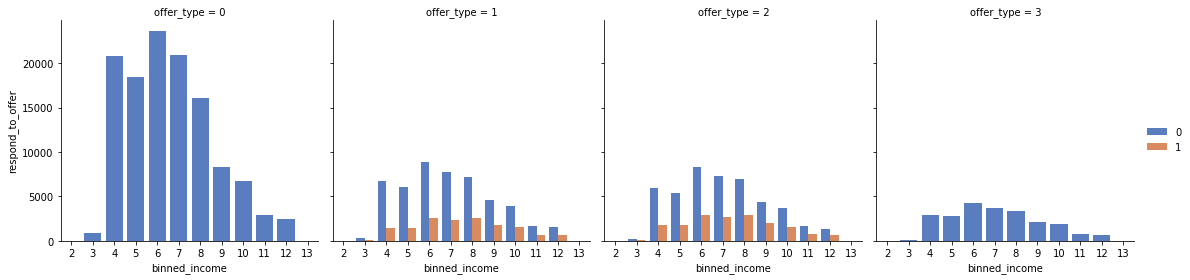

In [491]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs)

grid = sns.FacetGrid(data=df,col='offer_type',size=4,aspect=1)
fig = grid.map(countplot,'binned_income','respond_to_offer',palette='muted')
fig.add_legend()

In [493]:
print(*income_bins)

10000 20000 30000 40000 50000 60000 70000 80000 90000 100000 110000 120000 130000


**Insight: People with income between 60000 and 80000 spend most on offers BOGO and Discount**


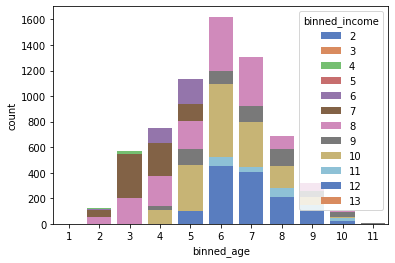

In [510]:
sns.countplot(data=df[df['respond_to_offer']==1],x='binned_age', hue= 'binned_income', palette='muted', dodge=False)

**Insight: People of age 50-70 of income between 60000-90000 respond most to offers type 'BOGO' and 'Discount'**
**So it will be good to send BOGO and Discount offers to these people**

## 5. Model Building <a id='model_building'></a>  

In [513]:
df.head()

,gender,customer_id,event,time,amount,offer_id,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,binned_income,year,month
0,0,0610b486422d4921ae7d2bf64640c50b,3,18,21.51,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
1,0,0610b486422d4921ae7d2bf64640c50b,3,144,32.28,0,0,0,0,0,0,0,0,0,0,6,12,2017,7
2,0,0610b486422d4921ae7d2bf64640c50b,1,408,0.00,7,1,7,5,5,1,1,0,1,0,6,12,2017,7
3,0,0610b486422d4921ae7d2bf64640c50b,1,504,0.00,4,3,4,0,0,1,1,0,1,0,6,12,2017,7
4,0,0610b486422d4921ae7d2bf64640c50b,3,528,23.22,0,0,0,0,0,0,0,0,0,0,6,12,2017,7


**Removing customer_id and offer_id** <br>
**Removing time and amount as these will be unknown for new customer** <br>
**Removing year and month as they don't correlate much with respond_to_offer**

In [514]:
df.drop(['customer_id', 'offer_id', 'time', 'amount', 'year', 'month'], axis=1, inplace=True)

In [515]:
df.head()

,gender,event,offer_type,duration,difficulty,reward,email,mobile,social,web,respond_to_offer,binned_age,binned_income
0,0,3,0,0,0,0,0,0,0,0,0,6,12
1,0,3,0,0,0,0,0,0,0,0,0,6,12
2,0,1,1,7,5,5,1,1,0,1,0,6,12
3,0,1,3,4,0,0,1,1,0,1,0,6,12
4,0,3,0,0,0,0,0,0,0,0,0,6,12


In [516]:
df.to_csv('final.csv', encoding='utf-8', index=False)

In [517]:
y = df['respond_to_offer']
X = df.drop('respond_to_offer', axis=1)


In [520]:
X.shape

(270033, 12)

In [521]:
y.shape

(270033,)

In [523]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [525]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
classifier = RandomForestClassifier()

In [526]:
# training
classifier.fit(X_train,y_train)

C:\Users\Rishabh\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [527]:
# predictions
y_pred = classifier.predict(X_test)

In [528]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [530]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[78484     0]
 [    0 10627]]




In [532]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78484
           1       1.00      1.00      1.00     10627

    accuracy                           1.00     89111
   macro avg       1.00      1.00      1.00     89111
weighted avg       1.00      1.00      1.00     89111





## 6. Hyperparameter Tuning <a id='tuning'></a>

In [536]:
rfc = RandomForestClassifier()

In [540]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [10,50,100,500,1000]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [541]:
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [542]:
# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 32.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [543]:
print(rfc_random.best_params_)

{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 260}


Training Random Forest on best parameters

In [545]:
model = RandomForestClassifier(n_estimators=1000, max_depth=260, max_features='auto')

In [546]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=260, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [547]:
y_pred_final = model.predict(X_test)

In [549]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred_final))

=== Confusion Matrix ===
[[78484     0]
 [    0 10627]]


In [550]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_final))

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78484
           1       1.00      1.00      1.00     10627

    accuracy                           1.00     89111
   macro avg       1.00      1.00      1.00     89111
weighted avg       1.00      1.00      1.00     89111



## 7. Conclusion <a id='conclusion'></a>

Overall, I found this project interesting and challenging, mainly due to the structure of the data. I had started out with the business question: <br>
<ul>
    <li>Which demographic groups respond best to which offer type.</li>
    <li>And create Machine Learning model to predict whether a customer will complete a offer by making transaction after viewing the offer.</li>
</ul>
So with Explanatory Data Analysis, I found
<ul>
<li>Male and Female almost equally complete the offer. So offers should be sent equally among them.</li>
<li>The two most completed offer of type are 'BOGO' and 'Discount'. So these two should be sent to more people.</li>
<li>People of age 50–70 of income between 60000–90000 respond most to offers type 'BOGO' and 'Discount'. So it will be good to send BOGO and Discount offers to these people.</li>
</ul>


**Future Work**:
<ul>
  <li>There may be overfitting which can be solved by considering more data.</li>
  <li>Build Machine Learning Pipeline to seamlessly classify new data.</li>
  <li>Make Machine Learning model to predict transaction amount.</li>
  <li>Deploy Machine Learning model to web.</li>
</ul>

